## Data Visualization with python

<a href="https://matplotlib.org/">Matplotlib</a> is one of the most popular and widely-used data visualization libraries for Python. Matplotlib was inspired by the plotting functionalities of MATLAB (a non-open source programming language). It provides a comprehensive set of tools for creating a broad variety of plot types, such as line plots, scatter plots, bar plots, histograms, heatmaps, and many more. 

In this session we will go through the main matplotlib concepts and we will generate several plots to illustrate matplotlib and pyplot potential.

## Preliminaries

We begin importing the pandas package in the same way we did in previous sessions:

In [1]:
import pandas as pd

The first thing to do to start visualizing data with python is importing the module `pyplot` from the `matplotlib` library. As with many of our previous imports, we import the module under an 'alias' (alternate shorter name) for convenience.

In [2]:
import matplotlib.pyplot as plt

A slightly different, but equivalent way to import pyplot is the following

In [3]:
from matplotlib import pyplot as plt

We also specify the command %matplotlib inline so that, when plotting, Jupyter Notebook will not display the plots into new windows, but in the notebook itself.

In [4]:
%matplotlib inline

Finally, as in previous sessions, we load the survey data into a pandas DataFrame:

In [5]:
surveys = pd.read_csv(('../course_materials/data/surveys.csv'))

## Simple data visualization

As you already found in session 6.5, data stored in pandas DataFrames can be visualized using a method called (surprisingly!) `plot`. This method containes all the functionalities of pyplot plotting functions and can be used on pandas DataFrames directly, without explicitly calling (and importing) pyplot. Let's have a look at a single example:

<Axes: xlabel='hindfoot_length', ylabel='weight'>

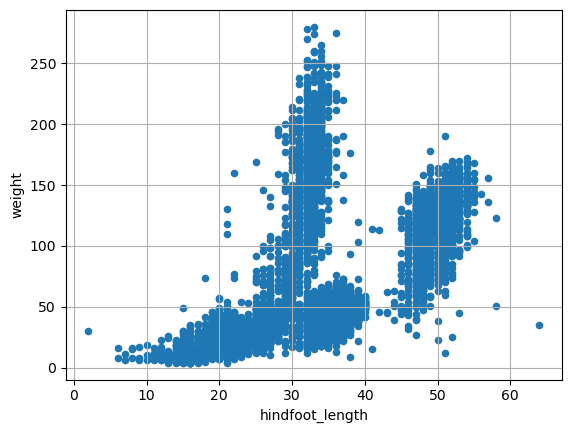

In [32]:
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True)

In the previous example we plotted weight VS hindfoot length using a scatter plot. The type of plot is specified via the argument _kind_, you can check out all the available kinds of plot [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). One of the advantages of the DataFrame `plot` method is that we can specify the columns to plot simply referring to their names, these will also be automatically used as labels for the x and y axes (or only the x axis depending on the kind of plot). We will now try to create the same plot using pyplot functions explicitly: 

Text(0.5, 0, 'hindfoot_length')

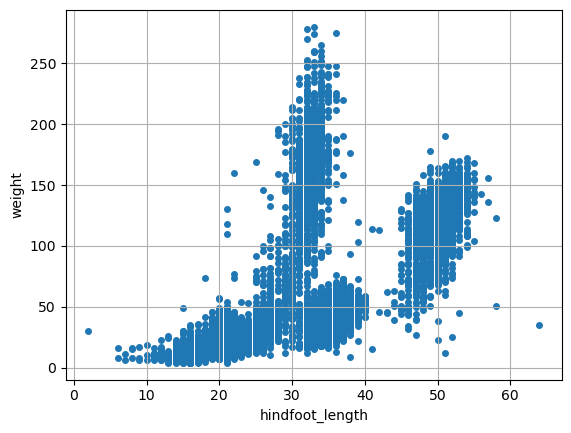

In [41]:
plt.scatter(x = surveys['hindfoot_length'],y = surveys['weight'], s=16)
plt.grid()
plt.ylabel('weight')
plt.xlabel('hindfoot_length')

As you may notice, using explicitly pyplot, we need some few more lines and arguments to specify the data to plot, the size (_s_) of the data points, and the axis labels, but the result is exactly the same.

## Matplotlib plot structure

In the previous examples we generated very simple plots to have a quick look at the data stored in our pandas DataFrame. However, with Matplotlib you can customize many more aspects of your plot: axes, x and y ticks and labels, titles, legends, and much more.

To get full control of the plots generated with `Matplotlib.pyplot`, it is important to be aware of the jargon used to describe the different layers of the figures that you create. 

- At the higher level we have **Figures**. A Figure is simply the total white space where you will organise your plots. You may think of it as the white page were you are going to draw your plots or also as a box containing all your plots. You can both have a single plot per Figure or multiple plots sharing the same Figure;
- At a lower level we have **Axes**. Axes are contained into Figures. _Axes_ is the name of a single plot or graph. This is probably the most confusing convention of matplotlib, as the word _Axes_, in common language, may indicate the x axis and y axis of a plot, but in matplot lib refers, as a matter of fact, to a single entire plot. Be aware of this difference! You can have a single Axes per Figure, so one plot per Figure (see Plot1 on the left of the figure below) or multiple Axes per Figure, like in Plot2 (on the right) where the same Figure contains three plots distributed in two rows: two on top and one on the bottom;
- Finally, each Axes (aka each plot) contains two **Axis**, i.e. x and y axis, the guidelines to populate your plots with data.

![Plot Hierarchy](images/plot_hierarchy.jpeg)

To summarize, `matplotlib` organizes plots into Figures, Axes, and Axis. A Figure is a canvas that can contain one or more Axes. An Axes is where data is plotted along two Axis, x and y. Specifying parameters at these three different levels, you can customize your plots to the finest details.

Certain attributes like the Figure size and the number of plots inside the Figure belong to the Figure level. Ticks, labels, plot title, legend, etc belong to the Axes level. Data is plotted on Axes according to the specified x and y Axis. The main features of a "typical" plot generated with `matplotlib` are well summarized by the picture below from matplotlib documentation:

<div style="text-align:center">
    <img src="images/anatomy.jpeg" alt="Plot Main Features" width="70%" />
</div>

## A customized plot

If what described above seems confusing, do not worry! While plot structure is something to be aware for more complex customization, pandas DataFrame `plot` method has a series of attributes regulating the main characteristics of our plot (check the `plot` documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Looking at our previous visualization, it seems that x and y label are too small, data points oftern overlap each other, and a title for the plot is missing. Furthermore, for publication purposes, we sould like our plot to occupy a space of 6x6 inches. Let's apply these specifications to our simple visualization: 

<class 'matplotlib.axes._axes.Axes'>


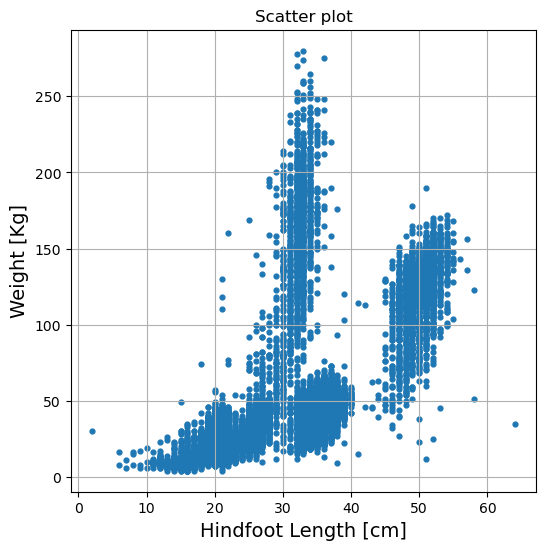

In [54]:
ax = surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, figsize=(6,6), title = 'Scatter plot')
ax.set_xlabel(xlabel = 'Hindfoot Length [cm]', fontsize=14)
ax.set_ylabel(ylabel = 'Weight [Kg]', fontsize=14)

print(type(ax))

This time we added some new parameters to our call: _s_ regulates the size of the data points, _figsize_ the (x,y) dimention of our plot in inches, and _title_ is a string containing the title of our plot, now displayed on top of it. <br>
To modify the character size of the x and y label we need to write some extra line outside the `plot` call, we need to work at the _Axes_ level. Every time a plot is created using matplotlib, a _Figure_ and an _Axes_ are also created. Luckily for us (and thanks to the pandas developers), the pandas DataFrame method `plot`, when called, returns the _Axes_ object that has been just created to visualize the data. That is why the result of `plot` is now stored in the variable _ax_ that, indeed, is a matplotlib _Axes_ object. An _Axes_ object has all kinds of methods to modify our plot look (check [here](https://matplotlib.org/stable/api/axes_api.html)). `set_xlabel` (or `set_ylabel`) is one of these methods, calling it on an _Axes_ we can specify the label content (_xlabel_) and size (_fontsize_). <br>
Working at the _Axes_ level, we now got better and more visible labels, optimal (for example) for a slide presentation.

So far we obtained our plot from a data object (a pandas DataFrame) using one of its methods, a way that we could call "bottom-up". However, it is possible to obtain an identical result using a "top-bottom" approach, i.e. first creating _Figure_ and _Axes_, and then plotting data on it. Let's see how:

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


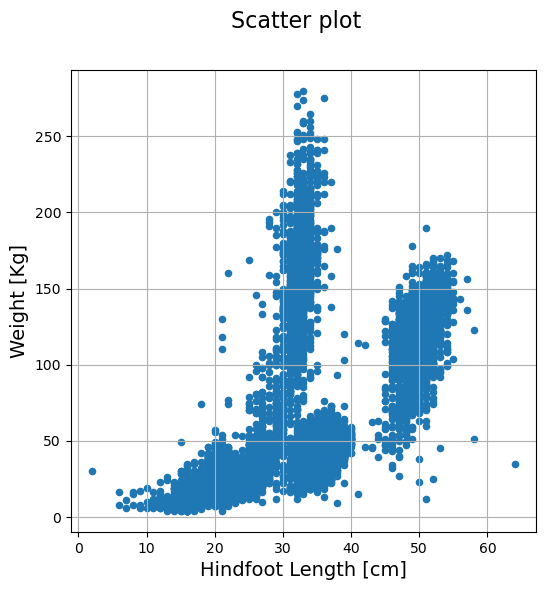

In [58]:
fig, my_ax = plt.subplots(figsize=(6,6)) # prepare a matplotlib figure

surveys.plot(x='hindfoot_length',y='weight',kind='scatter',ax=my_ax)

my_ax.set_xlabel(xlabel = 'Hindfoot Length [cm]', fontsize=14)
my_ax.set_ylabel(ylabel = 'Weight [Kg]', fontsize=14)
my_ax.grid()
fig.suptitle('Scatter plot', fontsize=16)

print(type(fig))
print(type(my_ax))

Note the following:
- Our plot (_Axes_) and the canvas containing it (_Figure_) are created at the same time using the pyplot function `subplots`. In `subplots` we used the parameter figure to specify the size of the _Figure_ in inches. _Figure_ and _Axes_ are stored in the variables _fig_ and _my_ax_, respectively;
- To plot data, we called the method `plot` on our pandas DataFrame as we did in our simple visualization, however this time we _already_ have a space where to plot our data, we do not need another one. To make use of our existing space, we use the parameter _ax_ of the `plot` method, indicating that there already exist a matplotlib _Axes_ where to plot the data and that this _Axes_ is called _my_ax_;
- The title "Scatter plot" is something external to our data plot, therefore we need to work at the figure level in order to display it. This is done calling the method _suptitle_ on our figure object.

## Creating subplots

If we want to create a figure that consists of multiple plots, we can still use the ```plt.subplots()``` function. The first two arguments of the function (_nrows_ and _ncols_) indicate the number of vertical and horizontal plots we want to fit in our gigure. In this case, we will create two plots side to side, so our grid will have one row and two columns. As we want to be sure that there will be enough space for our two plots, we also specify the size of the Figure to be 12 inches long and 6 inches high (inches is the default size unit, but you can specify different ones).

Our settings will produce plots distributed in one row and two columns, so a total of 2 plots. Therefore, in this case, ```plt.subplots()``` will return one _Figure_ object (the canvas containing all our plots) and 2 _Axes_ objects in a tuple. We will store these two _Axes_ into the variables _ax1_ and _ax2_.

<Axes: xlabel='hindfoot_length', ylabel='weight'>

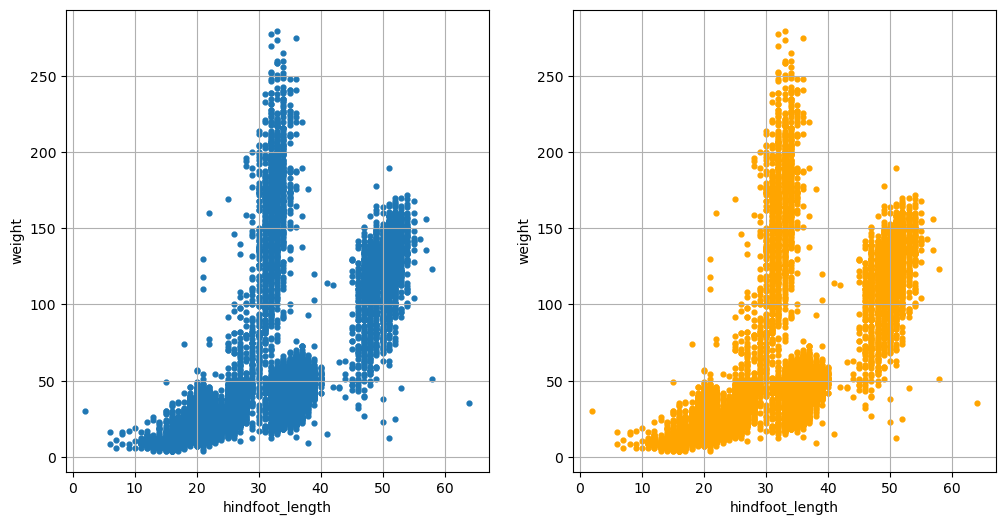

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, ax=ax1)
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, ax=ax2, color='orange')

In this case we plotted two identical plots side by side using two different colours (default blue and orange). If you want to change any visual characteristic, for example, of the left plot, you would call method on _ax1_. Note that plots can be arranged also vertically just changing the values of ncols and nrows.

When the number of plots become larger, it is convenient to store them into a single variable and access them by row anc olumn index. Here an example:

<Axes: xlabel='hindfoot_length', ylabel='weight'>

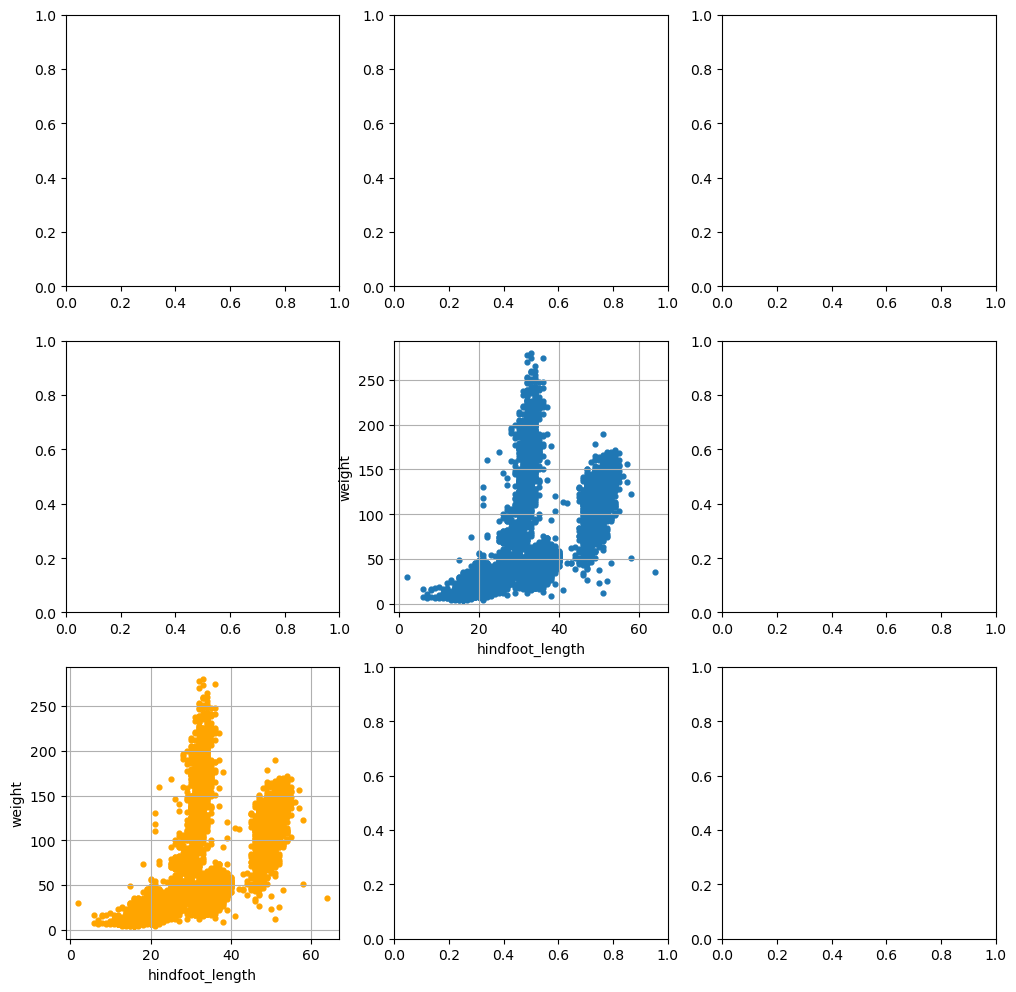

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12,12))
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, ax=axes[1][1])
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, ax=axes[2][0], color='orange')

In this case we set up a 3x3 grid of plots and we used only the very central spot (index [1][1]) and the first column of the third row (index [2][0]). When working with lists or tuples of object, always remember that in python indexing starts from 0. Note that the unised spaces will contain no data and remember that you can always adjust x and y label (sometimes suppressing them) using _Axes_ methods.

Let's see now another way to have multiple plots in the same figure. Once we defined a _Figure_ and an _Axes_, we can add other Axes to our Figure using ```fig.add_axes([left,bottom,length,height])```, where, as you may notice, the argument is a list containing the coordinates of our new Axes in the following format: [left edge, bottom edge, length, and height]. The left edge and bottom edge are scaled from 0 to 1, so that 0.5 corresponds to the center of the Figure. For example, the list of coordinates [0.5,0.5,0.33,0.33] will locate the bottom-left corner of our additional Axis at the very center of the figure. The new plot will be as wide as ~1/3 of the length of the figure and as high as ~1/3 of the height of the figure.

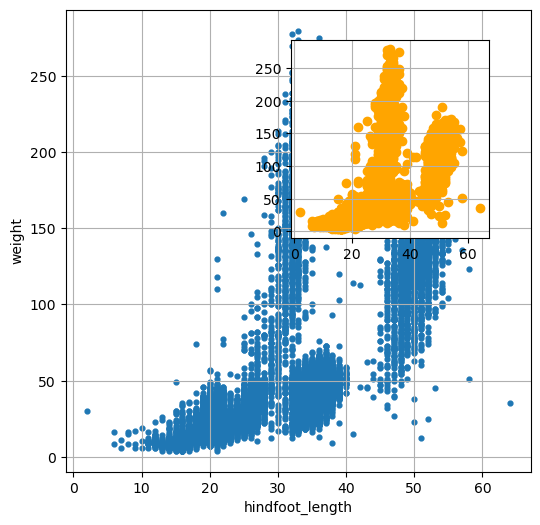

In [22]:
# prepare a matplotlib figure
fig, ax1 = plt.subplots(figsize=(6,6))
surveys.plot(x='hindfoot_length',y='weight',kind='scatter',grid=True, s=12, ax=ax1)

ax2 = fig.add_axes([0.5, 0.5, 0.33, 0.33])
ax2.scatter(surveys['hindfoot_length'],surveys['weight'], color='orange')
ax2.grid()

We saw that ```plt.subplots()``` parameters allow you to specify all sort of plot features: the size of the figure in inches or cm, the number of plots to display in the figure, how to arrange them in rows and columns, whether the subplots need to share the same axis, etc. The know more about subplots and take full control or your visualization, check out the [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

<div class="alert alert-block alert-success">
<b>Exercise 13</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with exercise 13.
</div>

## Plotting grouped data

You have already seen how to group data stored in pandas DataFrams and how to visualize data by group. In this session we will plot groupd data and customize our plot. If we want to quickly check if the pattern we observed in previously plotted data is the same in males and females, we can use a for loop and the groupby method to overlay two plots on top of each other in the same Axes object.

Text(0, 0.5, 'Weight')

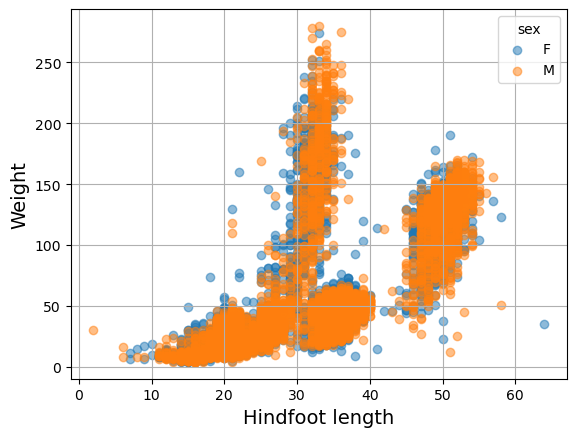

In [30]:
fig, ax = plt.subplots()

for i, group in list(surveys.groupby('sex')):
    ax.scatter(group['hindfoot_length'], group['weight'], alpha=0.5, label = group['sex'].iloc[0])
    
ax.legend(title='sex')
ax.grid()
ax.set_xlabel("Hindfoot length", fontsize=14)
ax.set_ylabel("Weight", fontsize=14)


By using `ax.scatter` 2 times inside the for loop, the two sets of points end up in the same **Axes**, one on top of the other following the order in which they are plotted. Colors are assigned automatically, but you can also create a list of colors and use one of them at each iteration of the loop. Specifying `alpha=0.5`, we can make the plotted dots semi-transparent, this attribute is particularly useful when overplotting data (like in this case). When plotting multiple grouped dataset on the same _Axes_ it is fundamental to label them and show a legend exaplining color conventions. This is automatically done specifying a label when data is plotted and by the `legend()` method on the _Axes_ object.

<div class="alert alert-block alert-success">
<b>Exercise 14</b>
    
Now go to the Jupyter Dashboard in your internet browser and continue with exercise 14.
</div>

### Saving your plot

Once you produced your plot you will probably need to share it in different media (website, papers, slide show, etc). To do that, we need to save our plot in a specific format. Once you have defined a Figure, you can do that with a single line of code:

In [ ]:
fig.savefig('MyFigure.png', dpi=200)

The Figure method ```savefig()``` will save your figure into a file. The first argument of the function is the name of the output file. Matplotlib will automatically recognize the format of the output file from its name. If you will specify only a name without extention, you can indicate the format explicitly with the parameter *format*. We also need to specify the dpi (dots per inch), i.e. the quality of the picture. The quality of the picture depends on the media we want to use. 200 dpi is good enough for visualization on a screen.

### What's next?

As we mentioned in the introduction, matplotlib library is huge and you can customize every single little feature of your plot. With matplotlib you can also create animations and 3D plots. Now that you know the basics of plotting data, have a look at the <a href="https://matplotlib.org/2.0.2/gallery.html">matplotlib gallery</a> to check the huge variety of plots you can generate with matplotlib.

Ok, Matplotlib is great, but is there anything else out there for data visualization? Yes, there is, [seaborn](https://seaborn.pydata.org/)! Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn syntax is almost identical to Matplotlib, checkout seaborn gallery [here](https://seaborn.pydata.org/examples/index.html).

<Axes: xlabel='hindfoot_length', ylabel='weight'>

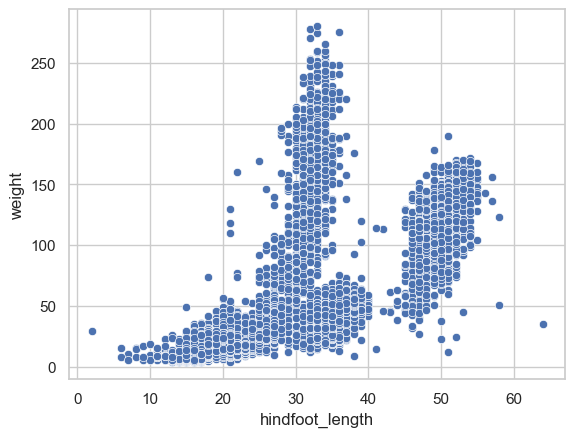

In [38]:
import seaborn as sns
sns.scatterplot(x=surveys['hindfoot_length'],y=surveys['weight'])

Well, if you are reading this it means you managed to get to the end of this Introduction to Python course, congratulations! Go to [What is next after this course](what-next.qmd), for tips on how to get started with Python in your own project!